In [1]:
!pip install deepface
!pip install matplotlib
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2024-02-08 13:18:54.074056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 13:18:54.074126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 13:18:54.126355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 13:18:54.229335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 13:18:55.732901: W tensorflow/compiler/tf2

In [2]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

# #face verification
# result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[1])

# #face recognition
# df = DeepFace.find(img_path = "img1.jpg", db_path = "C:/workspace/my_db", model_name = models[1])

# metrics = ["cosine", "euclidean", "euclidean_l2"]

# #face verification
# result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", distance_metric = metrics[1])
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face recognition
# df = DeepFace.find(img_path = "ResultsProxy/day11Emotion/ds/1.jpg", db_path = "ResultsProxy/day11Emotion/1", distance_metric = metrics[1], enforce_detection=False)

# Test

In [3]:
import cv2

In [5]:
import os
PATH ="ResultsProxy/day11Emotion/1"
PATH = "box_data/tests"
for file in os.listdir(PATH):
    if "png" in file:
        # obj = DeepFace.analyze(img_path = os.path.join(PATH, file), 
        #                        actions = ['emotion'], 
        #                        enforce_detection=False, 
        #                 model_name ="facenet512",)
        obj = DeepFace.verify(img1_path = "box_data/tests/positive_2_image.png", 
                               img2_path = "box_data/tests/positive_image.png",enforce_detection=False)
        obj
        # load image
        img = cv2.imread(os.path.join(PATH, file), cv2.IMREAD_UNCHANGED)
        plt.imshow(img)
        plt.show()
        print(obj)
    break
    # print(file)
    # print(obj)
    # print()

FileNotFoundError: [Errno 2] No such file or directory: 'box_data/tests'

[ERROR:0@39.401] global cap.cpp:643 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.9.0) /io/opencv/modules/videoio/src/cap_images.cpp:430: error: (-215:Assertion failed) !filename_pattern.empty() in function 'open'




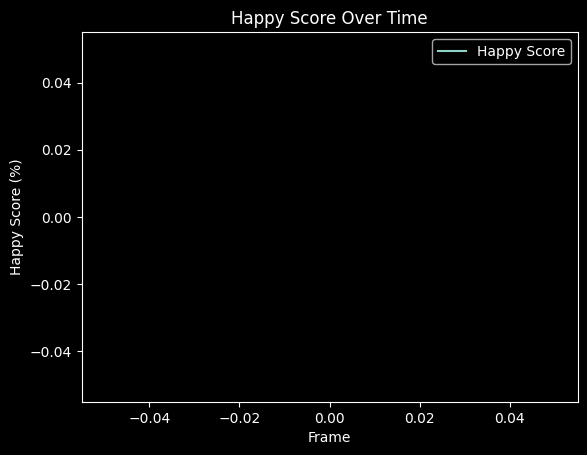

In [6]:
# process frames from video 
videoPATH = "box_data/tests/positive.mp4"
cap = cv2.VideoCapture(videoPATH)
# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object to save the output video
output_path = "output_video.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Initialize variables for running average
running_average_emotion = {"angry": 0, "disgust": 0, "fear": 0, "happy": 0, "sad": 0, "surprise": 0, "neutral": 0}
frame_count = 0


# Initialize Matplotlib plot
plt.ion()
fig, ax = plt.subplots()
ax.set_title("Happy Score Over Time")
ax.set_xlabel("Frame")
ax.set_ylabel("Happy Score (%)")
line, = ax.plot([], [], label="Happy Score")
ax.legend()

# Initialize variables for real-time plotting
x_data = []
y_data = []
happy_scores = []
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
     # Analyze emotions using DeepFace
    obj = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    obj = obj[0]
    instantaneous_emotion = obj["emotion"]
    happy_scores.append(instantaneous_emotion["happy"])
    # Update running average emotions
    frame_count += 1
    for emotion in running_average_emotion:
        running_average_emotion[emotion] += (instantaneous_emotion[emotion] - running_average_emotion[emotion]) / frame_count

    # Format text to display on the video
    text_instantaneous = f"Instantaneous Emotion: {obj['dominant_emotion']}"
    text_average = f"Running Average Emotion: {max(running_average_emotion, key=running_average_emotion.get)}"
    text_happy_score = f"Average Happy Score: {np.mean(happy_scores):.2f}/100"
    #print(running_average_emotion)

    # Update real-time plot
    x_data.append(frame_count)
    y_data = happy_scores
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    ax.relim()
    ax.autoscale_view()
    
    # Overlay text on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.4
    font_thickness = 1
    text_color = (255, 255, 255)
    text_position_instantaneous = (30, 50)
    text_position_average = (30, 80)

    cv2.putText(frame, text_instantaneous, text_position_instantaneous, font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, text_average, text_position_average, font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, text_happy_score, (30, 110), font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    # Write the frame with text to the output video
    out.write(frame)

    # Display the frame with text
    cv2.imshow('Frame', frame)
    
    # Update Matplotlib plot
    plt.pause(0.01)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
2024-02-08 13:23:00.516260: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-08 13:23:00.694998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-08 13:23:00.695047: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-08 13:23:00.697928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: 

24-02-08 13:23:02 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /home/rdverse/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 25.4MB/s]
2024-02-08 13:23:06.670401: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-02-08 13:23:10.896542: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-08 13:23:10.922864: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-08 13:23:10.922935: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:110] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2024-02-08 13:23:10.947609: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn ch

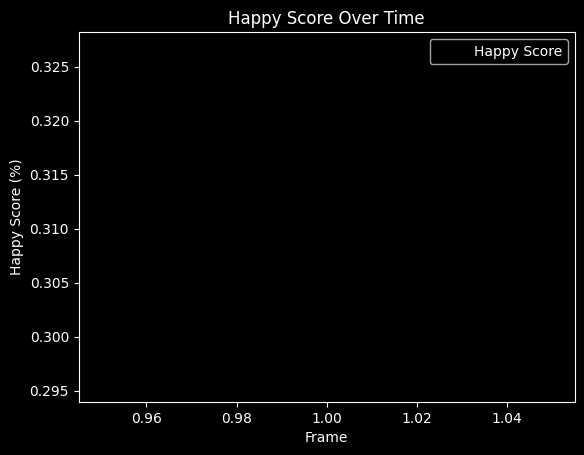

In [9]:
def mpl_to_opencv_image(fig):
    """
    Convert Matplotlib figure to an OpenCV image.
    """
    # Render the figure to a buffer
    buf, (w, h) = fig.canvas.print_to_buffer()
    buf_rgba = np.frombuffer(buf, dtype=np.uint8).reshape((h, w, 4))

    # Convert RGBA to RGB
    buf_rgb = buf_rgba[:, :, :3]

    return buf_rgb
import cv2
from deepface import DeepFace
import numpy as np
import matplotlib.pyplot as plt

def mpl_to_opencv_image(fig):
    """
    Convert Matplotlib figure to an OpenCV image.
    """
    # Render the figure to a buffer
    buf, (w, h) = fig.canvas.print_to_buffer()
    buf_rgba = np.frombuffer(buf, dtype=np.uint8).reshape((h, w, 4))

    # Convert RGBA to RGB
    buf_rgb = buf_rgba[:, :, :3]

    return buf_rgb

# Video input path
video_path = "box_data/tests/negative.mp4"
video_path = "../box_data/tests/input/snippet.mp4"
cap = cv2.VideoCapture(video_path)
output_path = "box_data/tests/output/negative.mp4"
output_path = "../box_data/tests/output/snippet_negative.mp4"

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Initialize variables for running average and happy scores
running_average_emotion = {"angry": 0, "disgust": 0, "fear": 0, "happy": 0, "sad": 0, "surprise": 0, "neutral": 0}
frame_count = 0
happy_scores = []

# Initialize Matplotlib plot
plt.ion()
fig, ax = plt.subplots()
ax.set_title("Happy Score Over Time")
ax.set_xlabel("Frame")
ax.set_ylabel("Happy Score (%)")
line, = ax.plot([], [], label="Happy Score", color="black", linewidth=4)
ax.legend()

# Initialize variables for real-time plotting
x_data = []
y_data = []

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Analyze emotions using DeepFace
    obj = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    obj = obj[0]
    instantaneous_emotion = obj["emotion"]
    happy_scores.append(instantaneous_emotion["happy"])

    # Update running average emotions
    frame_count += 1
    for emotion in running_average_emotion:
        running_average_emotion[emotion] += (instantaneous_emotion[emotion] - running_average_emotion[emotion]) / frame_count

    # Update real-time plot
    x_data.append(frame_count)
    y_data = happy_scores
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    #ax.set_ylim([0, 100])
    ax.relim()
    ax.autoscale_view()

    # Convert Matplotlib plot to an image
    plot_img = mpl_to_opencv_image(fig)

    # Resize plot image to match video frame dimensions
    plot_img = cv2.resize(plot_img, (width, int(height / 4)))  # Adjust height as needed

    # Overlay plot image onto the top of the video frame
    frame[frame.shape[0]-plot_img.shape[0]:, :] = cv2.addWeighted(frame[frame.shape[0]-plot_img.shape[0]:, :], 0, plot_img, 1, 0)

    # Format text to display on the video
    text_instantaneous = f"Instantaneous Emotion: {obj['dominant_emotion']}"
    text_average = f"Running Average Emotion: {max(running_average_emotion, key=running_average_emotion.get)}"
    text_happy_score = f"Average Happy Score: {np.mean(happy_scores):.2f}/100"

    # Overlay text on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.4
    font_thickness = 1
    text_color = (255, 255, 255)
    text_position_instantaneous = (30, int(height / 4) + 70)
    text_position_average = (30, int(height / 4) + 90)
    
    cv2.putText(frame, text_instantaneous, text_position_instantaneous, font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, text_average, text_position_average, font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame, text_happy_score, (30, int(height / 4) + 130), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # Write the frame with text to the output video
    out.write(frame)

    # Display the frame with text
    cv2.imshow('Frame', frame)

    # Update Matplotlib plot
    plt.pause(0.01)
    key = cv2.waitKey(30)  # You can adjust the delay time (in milliseconds)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Get emotion scores for everything in the directory

In [21]:
PATH ="ResultsProxy/day11Emotion"
scores = dict()
import tqdm
for root,dirs,files in os.walk(PATH):
    person = root.split("/")[-1]
    if person not in scores.keys():
        scores[person] = dict() 
    
    print(f"Current Person {person}")
    
    fileNos = [int(f.strip(".jpg")) for f in files]
    sortFileNos = sorted(fileNos, reverse=False)
    fileIndices = [fileNos.index(f) for f in sortFileNos]
    files = [str(fileNos[i]) + ".jpg" for i in fileIndices]
    
    for file in tqdm.tqdm(files):
        emotion = DeepFace.analyze(img_path = os.path.join(root, file), actions = ['emotion'], enforce_detection=False)
        emotion = emotion["emotion"]
        for key, val in emotion.items():
            if key not in scores[person].keys():
                scores[person][key] = list()
            scores[person][key].append(val)

Current Person day11Emotion


0it [00:00, ?it/s]


Current Person 10


100%|██████████| 3528/3528 [02:54<00:00, 20.17it/s]


Current Person 6


100%|██████████| 6223/6223 [05:05<00:00, 20.37it/s]


Current Person 1


100%|██████████| 8386/8386 [07:13<00:00, 19.35it/s]


Current Person 7


100%|██████████| 8855/8855 [06:58<00:00, 21.18it/s]


Current Person 9


100%|██████████| 8212/8212 [06:07<00:00, 22.35it/s]


Current Person 3


100%|██████████| 8998/8998 [09:24<00:00, 15.95it/s]


Current Person 2


100%|██████████| 8140/8140 [05:21<00:00, 25.30it/s]


Current Person 99


100%|██████████| 4/4 [00:00<00:00, 18.92it/s]


In [22]:

dfP = pd.read_csv("correlate/personAngles.csv").sort_values(by="usfID")
dfUSF = pd.read_csv("correlate/usfcmaidata.csv")
dfUSF =dfUSF[dfUSF["pid"].isin(dfP.usfID)]
dfUSF =dfUSF[dfUSF["doi"]=="16sep2019"].sort_values(by="pid")

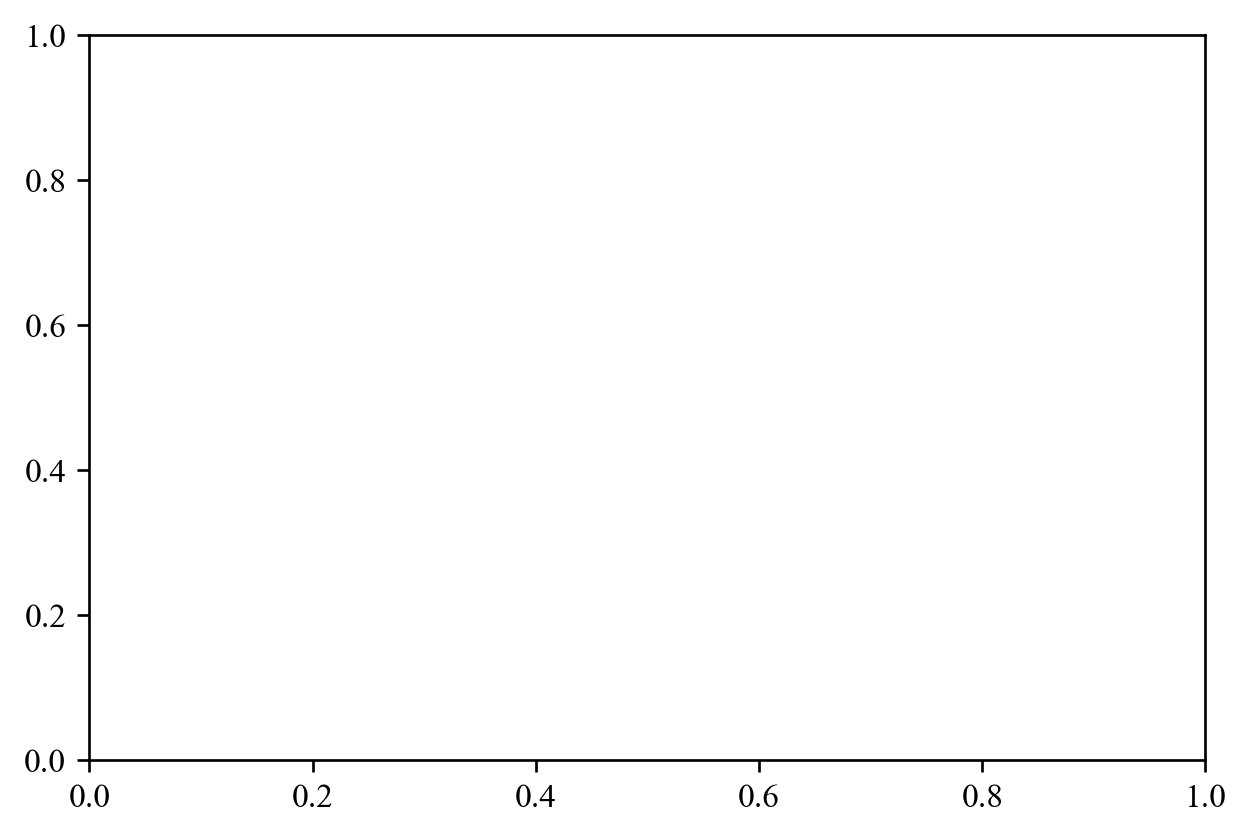

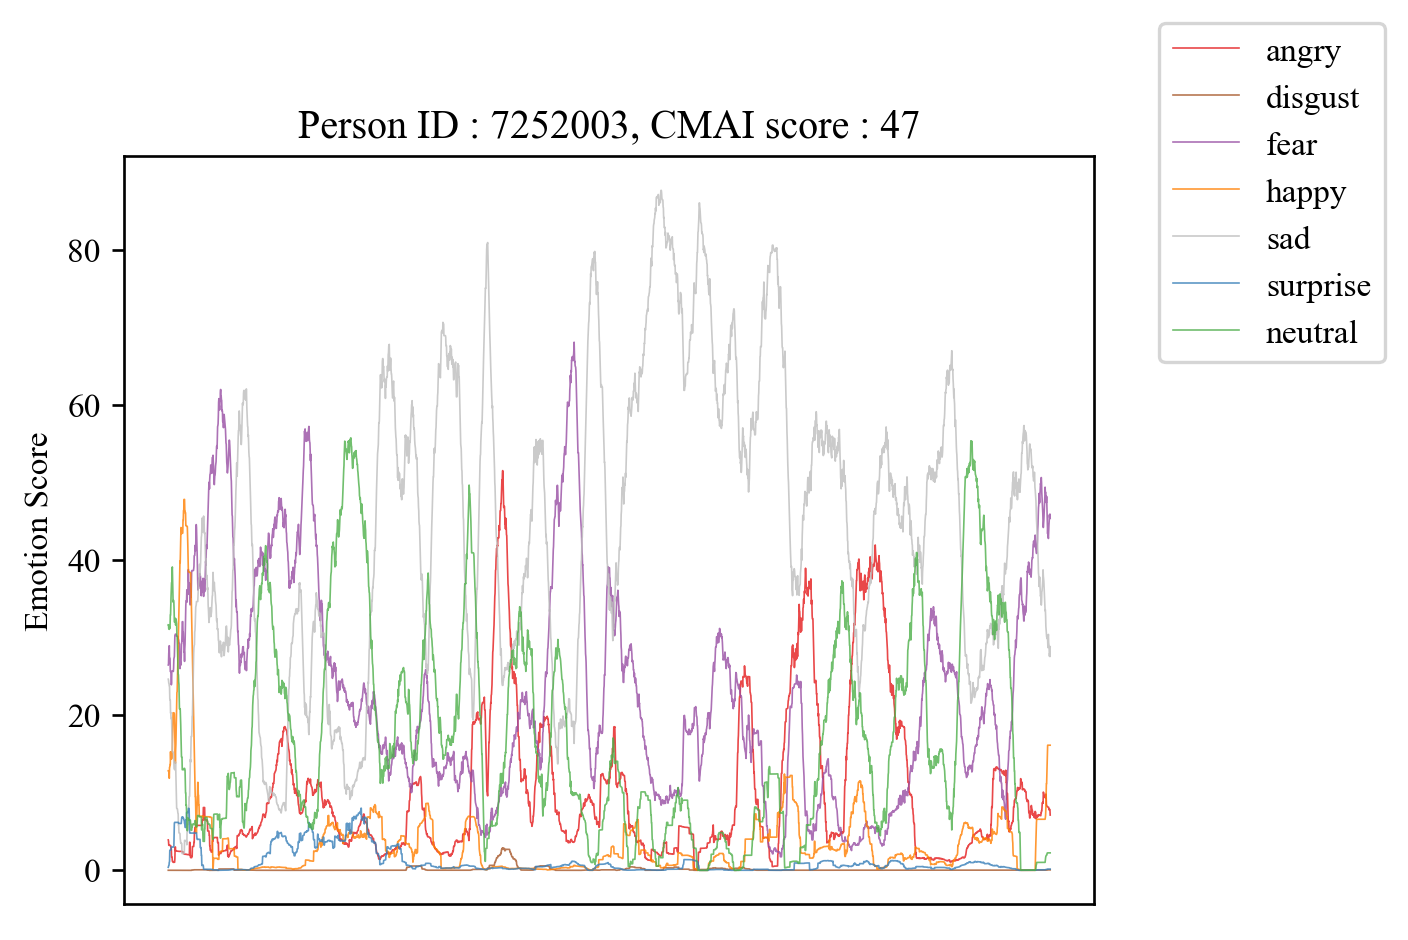

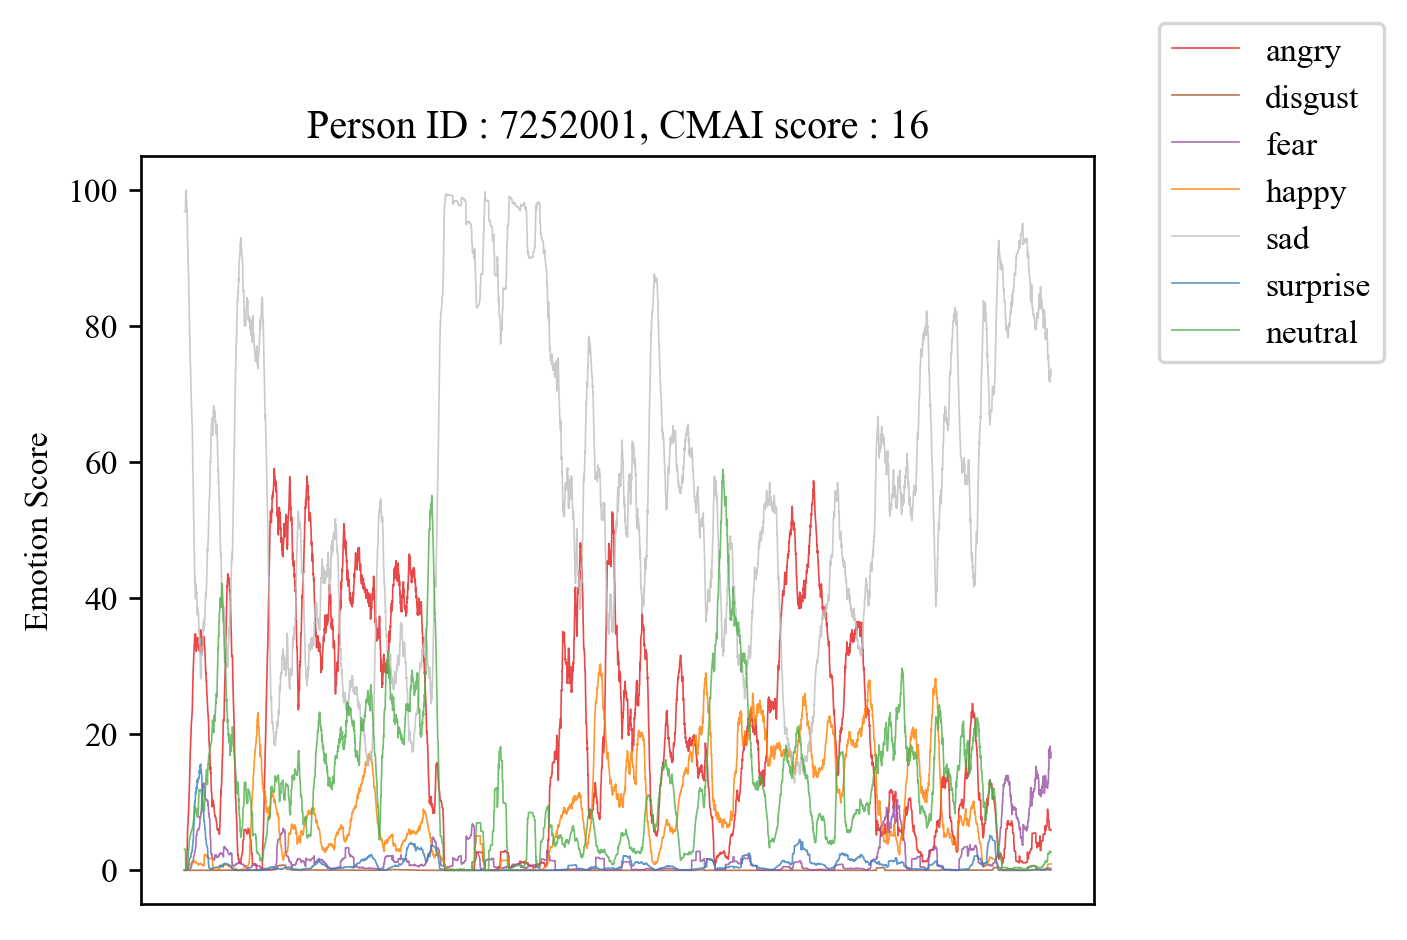

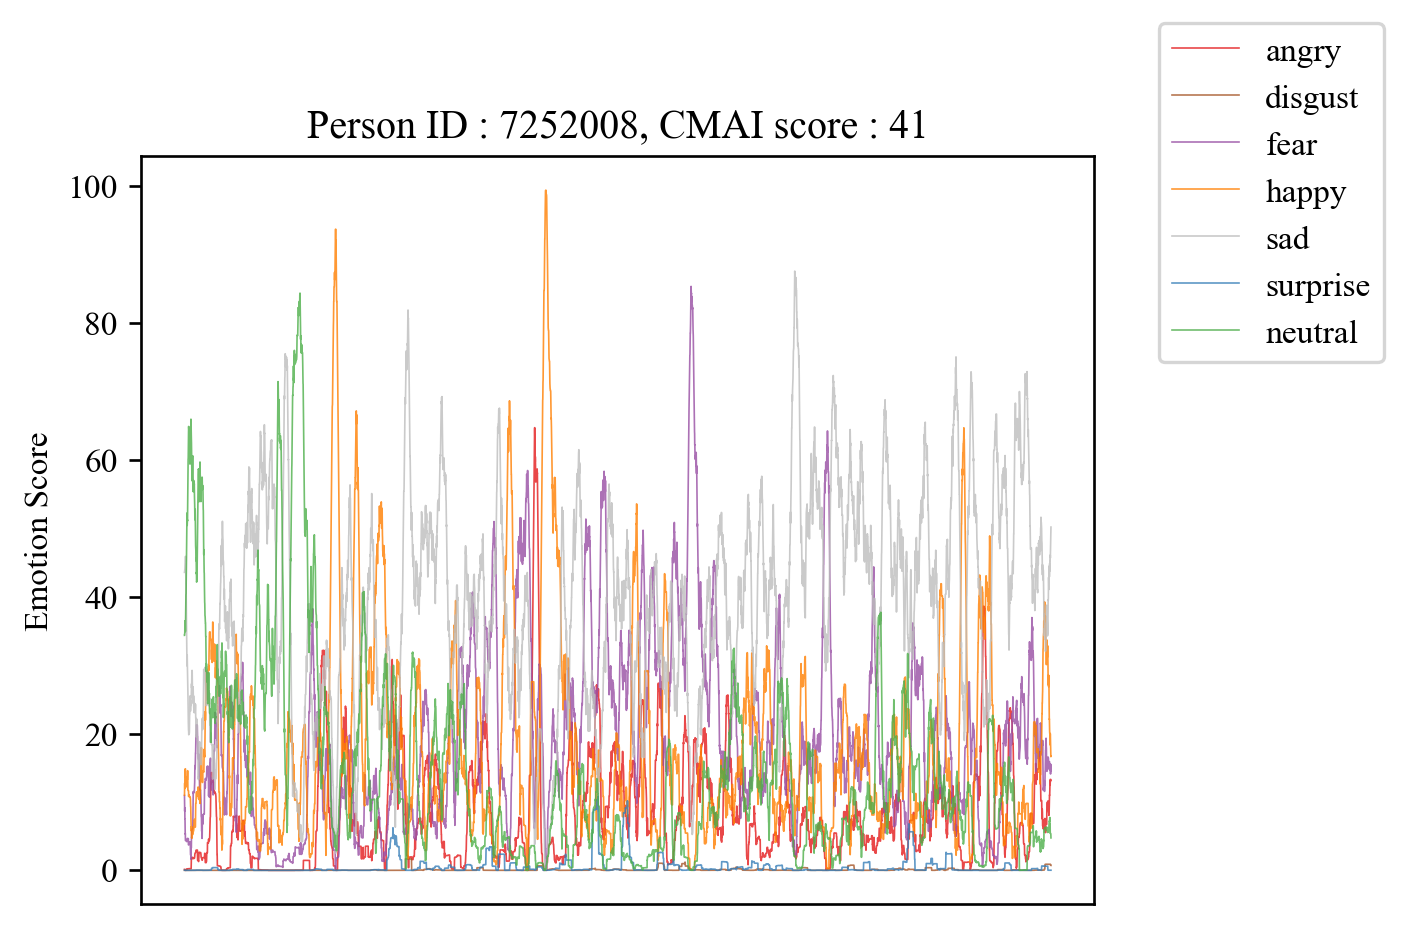

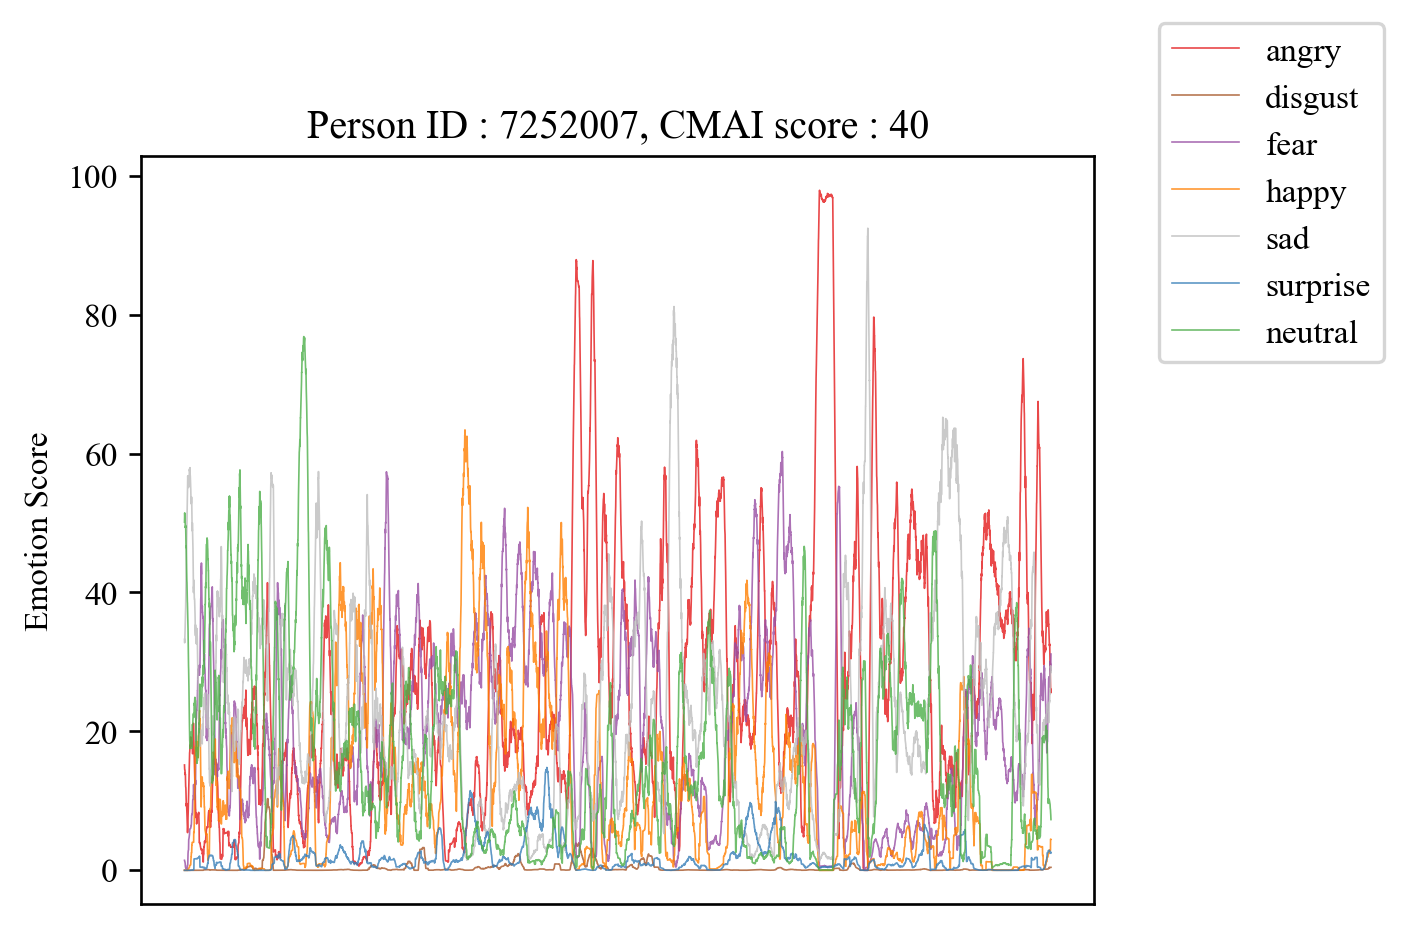

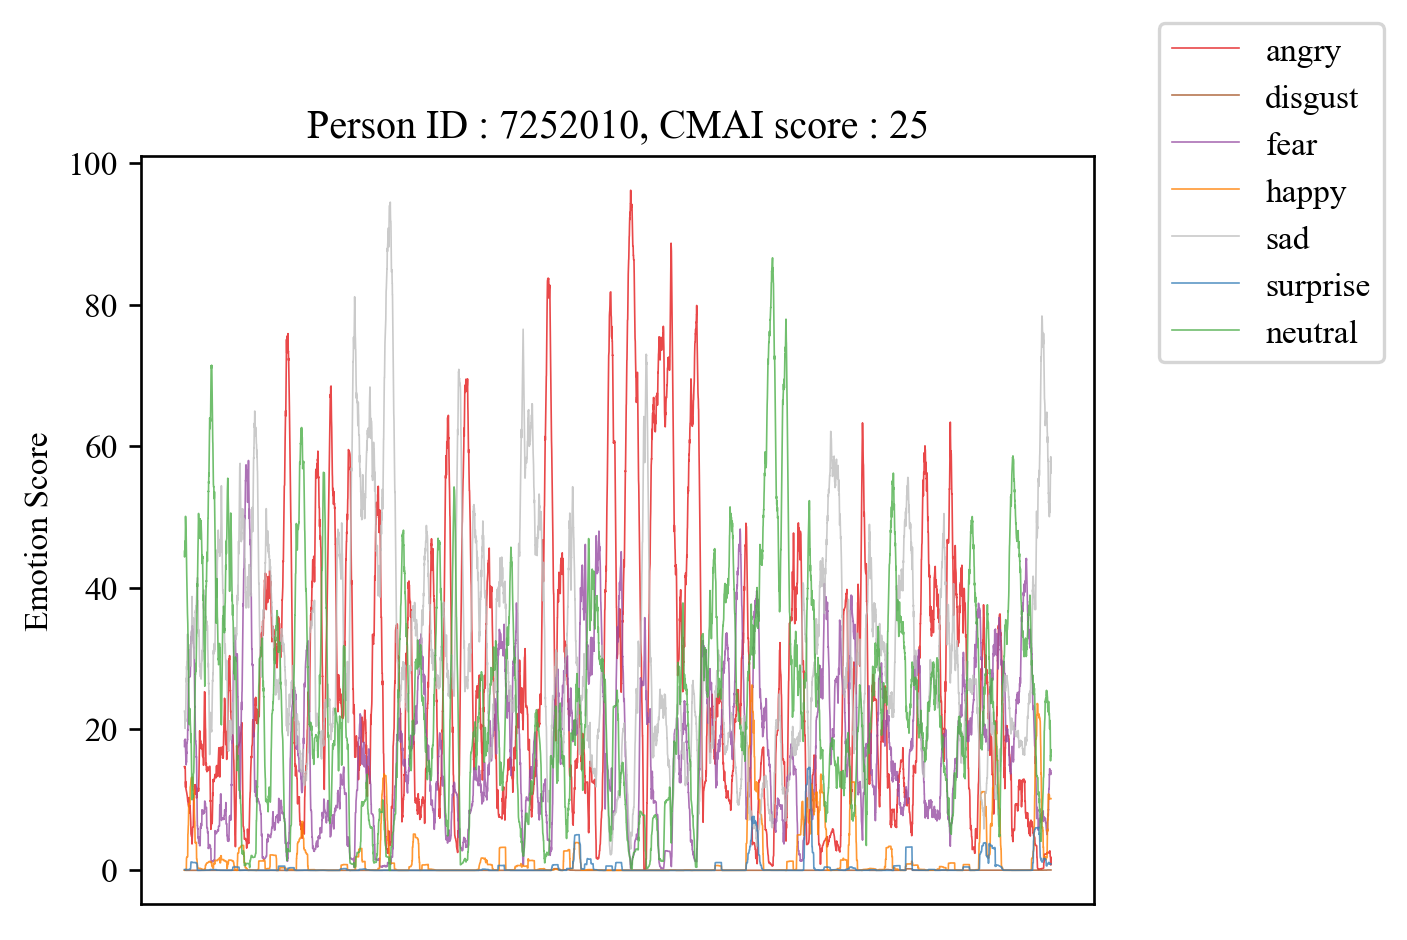

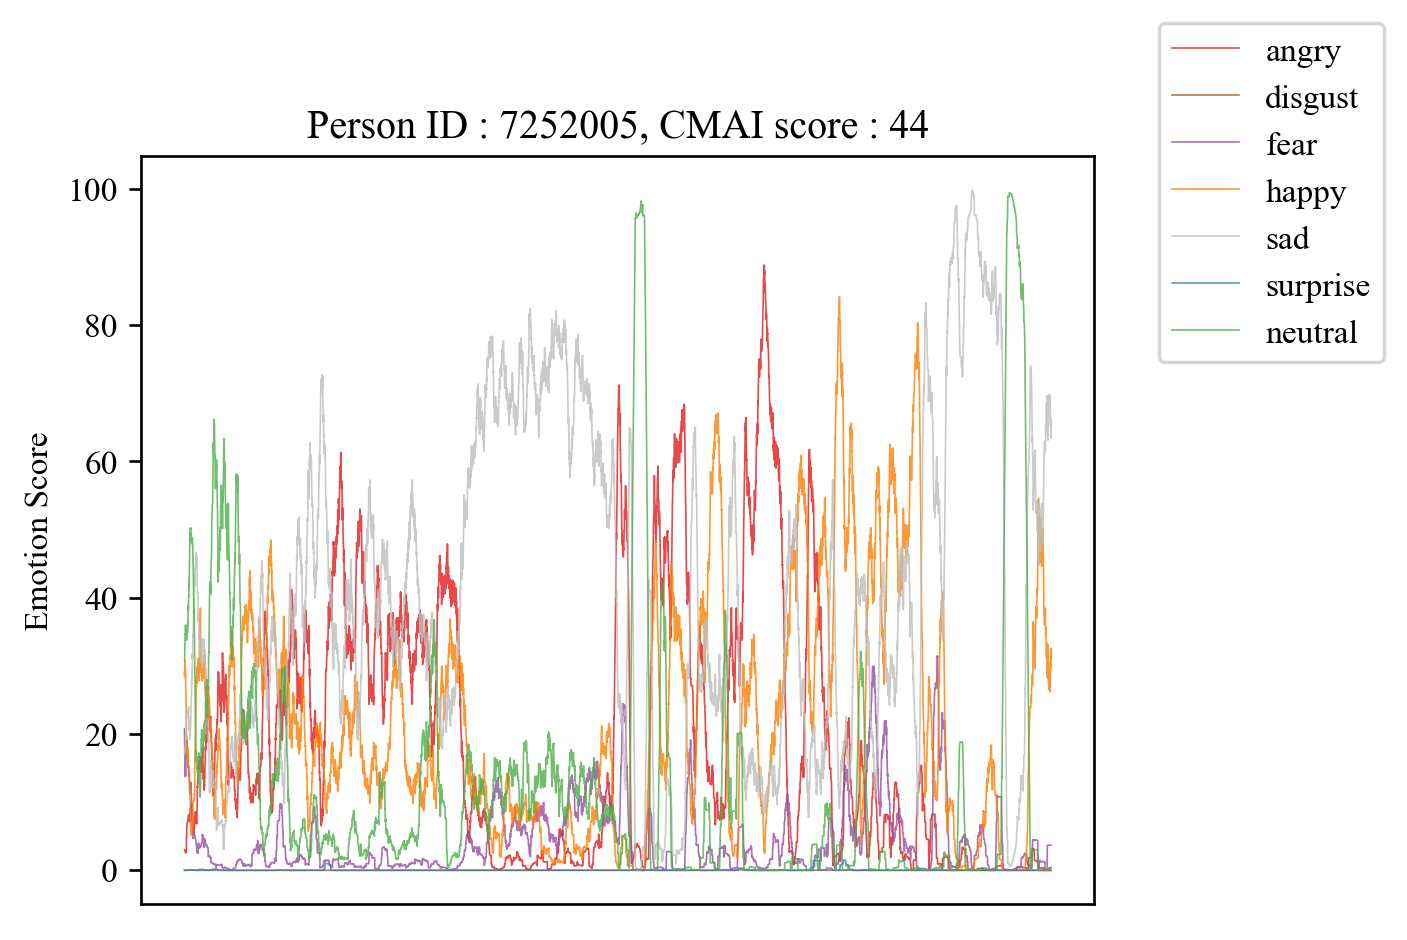

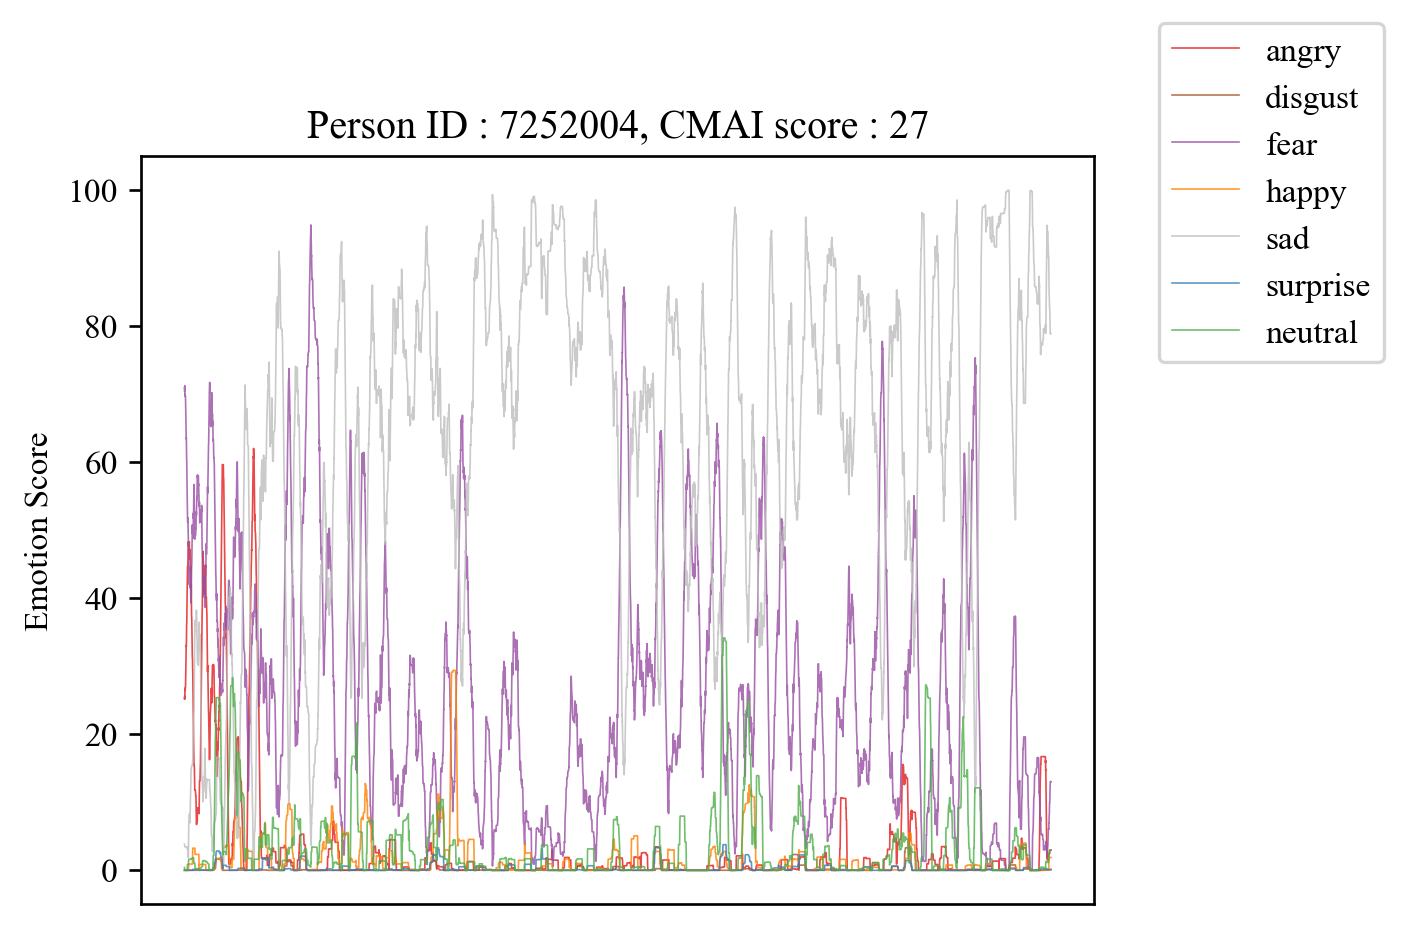

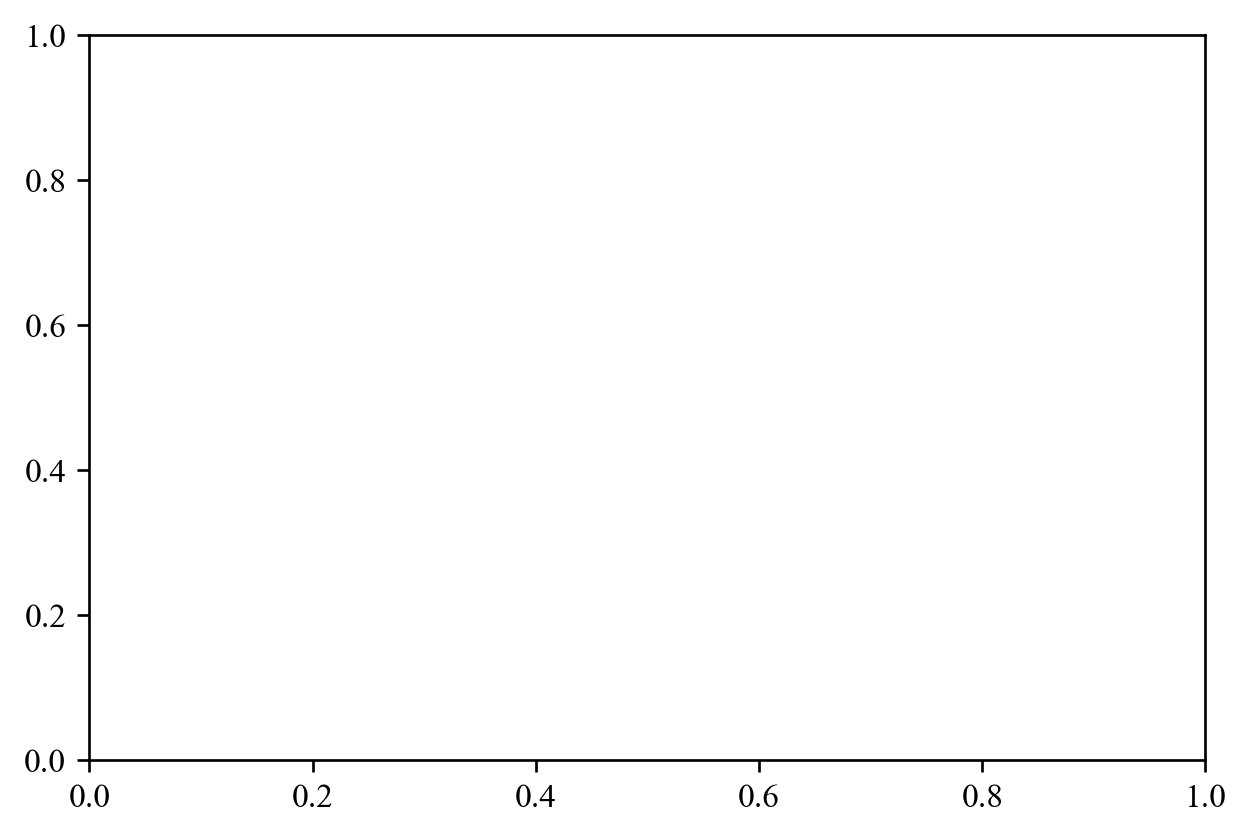

In [34]:
colors = {'angry':"#e41a1c",
  'disgust': "#a65628",
  'fear': "#984ea3",
  'happy': "#ff7f00",
  'sad': "#bdbdbd",
  'surprise': "#377eb8",
  'neutral': "#4daf4a"}
from sklearn.metrics import confusion_matrix
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
# plt.rcParams['figure.dpi'] = 1000
plt.rcParams["lines.linewidth"] = 0.5

def ma(x, w):
  return np.convolve(x, np.ones(w), 'valid') / w

for person in scores.keys():
    plt.figure(figsize=(6,4), dpi =240)
    ax = plt.subplot()

    try:
      idx = dfP.usfID[dfP["personID"]==int(person)]
    except:
      continue
    if idx.empty:
        continue
    idx = idx.item()
    
    for emotion in scores[person].keys():
      length = len(ma(scores[person][emotion],60))
      ax.plot(np.arange(length), ma(scores[person][emotion],60), color=colors[emotion], alpha=0.8, label=emotion)
    # ax.set_xlabel("Video Frames")
    ax.set_ylabel("Emotion Score")

    cmai = dfUSF.cmai[dfUSF["pid"]==int(idx)].item()

    ax.set_title("Person ID : {}, CMAI score : {}".format(idx, cmai))
    ax.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    ax.set_xticks([])
    plt.tight_layout()
    plt.savefig(f"track_{idx}.jpg")
    # ax.set_facecolor((0, 0, 0))
    plt.show()

In [24]:
meanScores = {key: {kkey : np.mean(vall) for kkey, vall in val.items()} for key, val in scores.items()}
scoreDF = pd.DataFrame.from_dict(meanScores)
for p in dfP[["usfID","personID"]].values:
    scoreDF.rename(columns={str(p[1]) : str(p[0])}, inplace=True)    
scoreDF.to_csv("correlateEmotions.csv")
scoreDF.T.to_csv("correlateEmotionsT.csv")

In [63]:
dfP.usfID[dfP["personID"]==person].empty

True

In [84]:
idx = dfP.usfID[dfP["personID"]==6].item()
idx

7252001